In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
import warnings
warnings.filterwarnings("ignore")

In [33]:
g_data=pd.read_csv(r"C:\Users\pramita shelke\Downloads\gold_Data.csv")

In [34]:
g_data

,Date,SPX,USO,SLV,EUR/USD,GLD
0,02-01-2008,1447.160034,78.470001,15.1800,1.471692,84.860001
1,03-01-2008,1447.160034,78.370003,15.2850,1.474491,85.570000
2,04-01-2008,5000.000000,77.309998,15.1670,1.475492,85.129997
3,07-01-2008,1416.180054,75.500000,15.0530,1.468299,84.769997
4,08-01-2008,1390.189941,76.059998,15.5900,1.557099,86.779999
...,...,...,...,...,...,...
2285,08-05-2018,2671.919922,14.060000,15.5100,1.186789,124.589996
2286,09-05-2018,2697.790039,14.370000,15.5300,1.184722,124.330002
2287,10-05-2018,2723.070068,14.410000,15.7400,1.191753,125.180000
2288,14-05-2018,2730.129883,14.380000,15.5600,1.193118,124.489998


In [35]:
g_data.head()

,Date,SPX,USO,SLV,EUR/USD,GLD
0,02-01-2008,1447.160034,78.470001,15.180,1.471692,84.860001
1,03-01-2008,1447.160034,78.370003,15.285,1.474491,85.570000
2,04-01-2008,5000.000000,77.309998,15.167,1.475492,85.129997
3,07-01-2008,1416.180054,75.500000,15.053,1.468299,84.769997
4,08-01-2008,1390.189941,76.059998,15.590,1.557099,86.779999


In [36]:
g_data.tail()

,Date,SPX,USO,SLV,EUR/USD,GLD
2285,08-05-2018,2671.919922,14.0600,15.5100,1.186789,124.589996
2286,09-05-2018,2697.790039,14.3700,15.5300,1.184722,124.330002
2287,10-05-2018,2723.070068,14.4100,15.7400,1.191753,125.180000
2288,14-05-2018,2730.129883,14.3800,15.5600,1.193118,124.489998
2289,16-05-2018,2725.780029,14.4058,15.4542,1.182033,122.543800


In [37]:
g_data.shape

(2290, 6)

In [38]:
g_data.sample()

,Date,SPX,USO,SLV,EUR/USD,GLD
1190,30-05-2013,1654.410034,33.25,21.98,1.304393,136.699997


In [39]:
g_data.columns

Index(['Date', 'SPX', 'USO', 'SLV', 'EUR/USD', 'GLD'], dtype='object')

In [40]:
g_data.dtypes

Date        object
SPX        float64
USO        float64
SLV        float64
EUR/USD    float64
GLD        float64
dtype: object

In [41]:
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   USO      2288 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
 5   GLD      2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [42]:
g_data.describe()

,SPX,USO,SLV,EUR/USD,GLD
count,2290.000000,2288.000000,2290.000000,2290.000000,2290.000000
mean,1655.882750,31.805741,20.084997,1.283653,122.732875
std,523.773592,19.492980,7.092566,0.131547,23.283346
min,676.530029,7.960000,8.850000,1.039047,70.000000
25%,1239.874969,14.377500,15.570000,1.171313,109.725000
50%,1551.849976,33.865000,17.268500,1.303297,120.580002
75%,2073.977539,37.820000,22.882500,1.369971,132.840004
max,5000.000000,117.480003,47.259998,1.598798,184.589996


# 1. Checking Missing Values

In [43]:
g_data.isna().sum()                #only 2 null values are present in the USO column

Date       0
SPX        0
USO        2
SLV        0
EUR/USD    0
GLD        0
dtype: int64

In [44]:
g_data["USO"].fillna(g_data["USO"].median(),inplace=True)        # replace null values to median

In [45]:
g_data.isna().sum()          # Now there are no null values present

Date       0
SPX        0
USO        0
SLV        0
EUR/USD    0
GLD        0
dtype: int64

In [47]:
# there is no null value

# 2. Drop the unnecessary Column 

In [48]:
g_data.drop(["Date"],axis=1,inplace=True)

In [49]:
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   USO      2290 non-null   float64
 2   SLV      2290 non-null   float64
 3   EUR/USD  2290 non-null   float64
 4   GLD      2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


# Splitting the Dataset

In [50]:
X=g_data.drop(columns="GLD")             #target column dropped
y=g_data["GLD"]

# numerical Columns separated

In [51]:
X.describe(include=["float64"]).columns

Index(['SPX', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [52]:
num_col= ['SPX', 'USO', 'SLV', 'EUR/USD']
num_col

['SPX', 'USO', 'SLV', 'EUR/USD']

# 3. Skewness Detection

In [53]:
X[num_col].skew()                         # if skew high

SPX        0.397434
USO        1.706291
SLV        1.153641
EUR/USD   -0.005292
dtype: float64

In [54]:
# Plotting kde plot to see the skewness

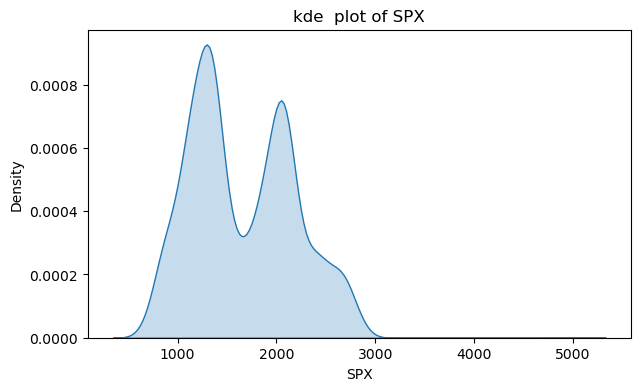

The skewness of SPX is :0.39743443309959553


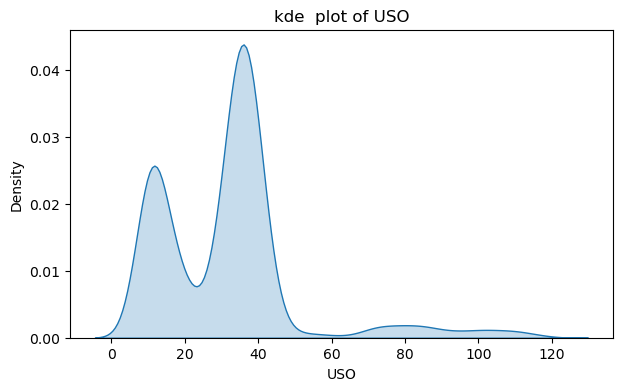

The skewness of USO is :1.7062911516480628


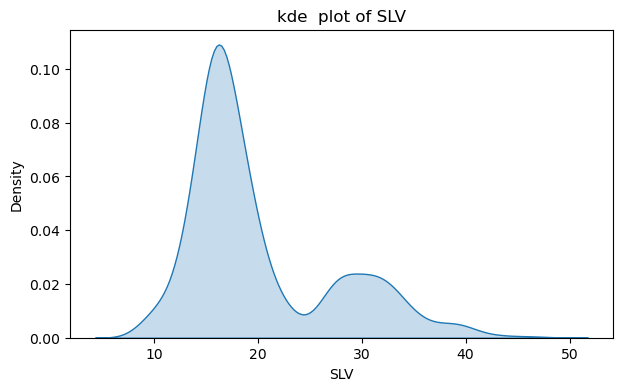

The skewness of SLV is :1.1536409144141129


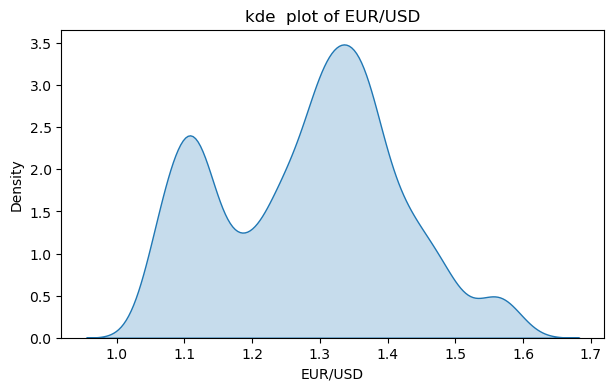

The skewness of EUR/USD is :-0.005292277033840682


In [55]:
for col in num_col:
    plt.figure(figsize=(7,4))
    sns.kdeplot(x=X[col],fill=True)
    plt.title(f"kde  plot of {col}")
    plt.show()
    print(f"The skewness of {col} is :{X[col].skew()}")

# Outliers detecting

<Axes: >

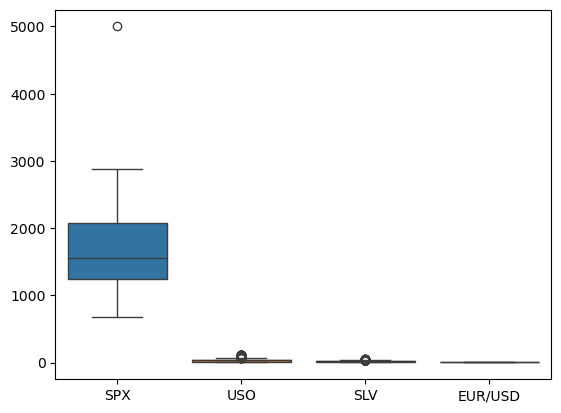

In [56]:
sns.boxplot(X)

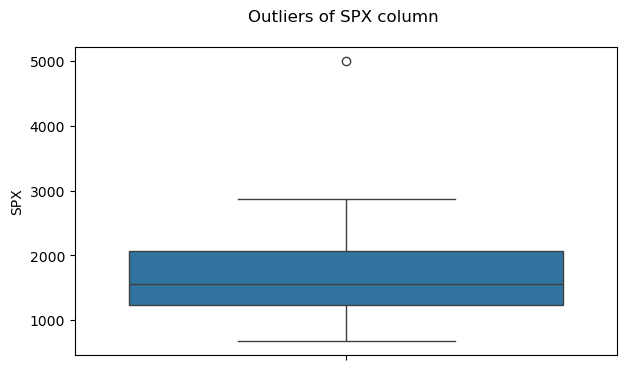

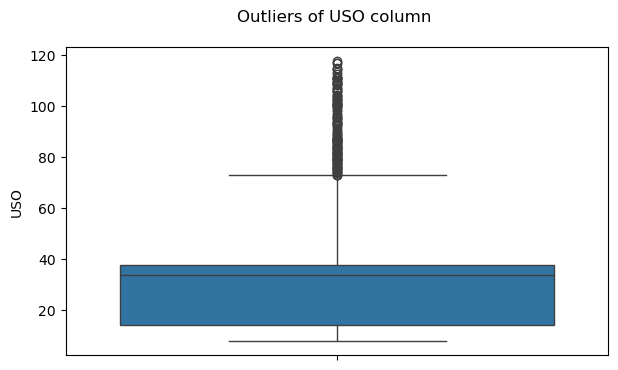

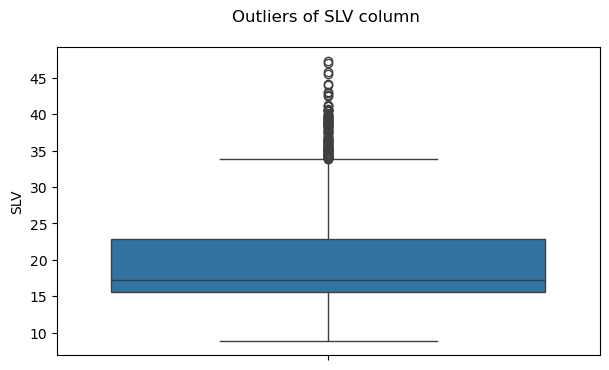

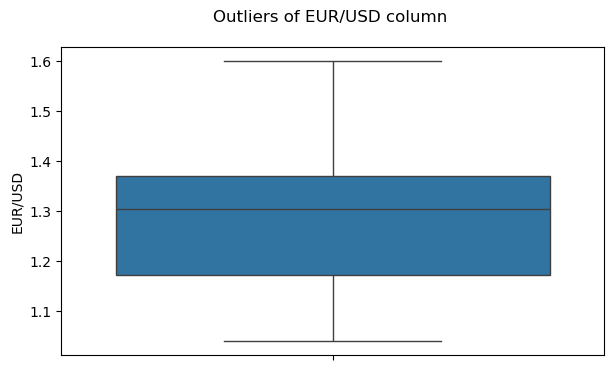

In [57]:
for col in num_col:
    plt.figure(figsize=(7,4))
    sns.boxplot(X[col],fill=True)
    plt.title(f"Outliers of {col} column \n")
    plt.show()

# Handling Outliers

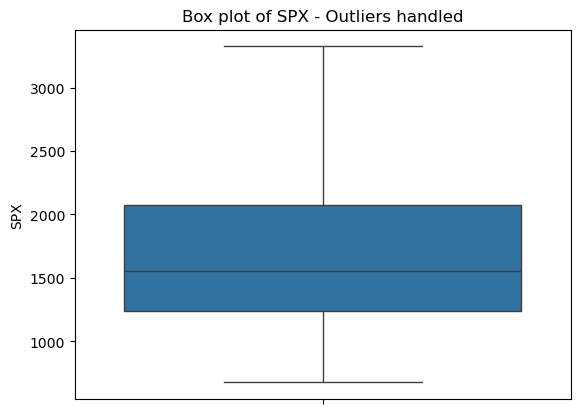

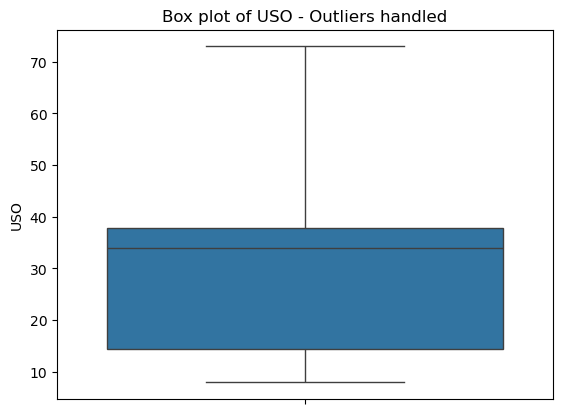

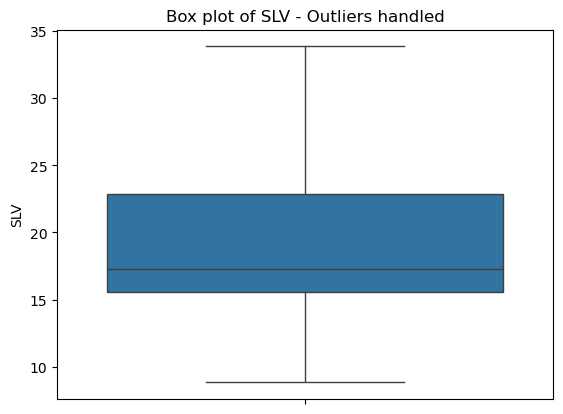

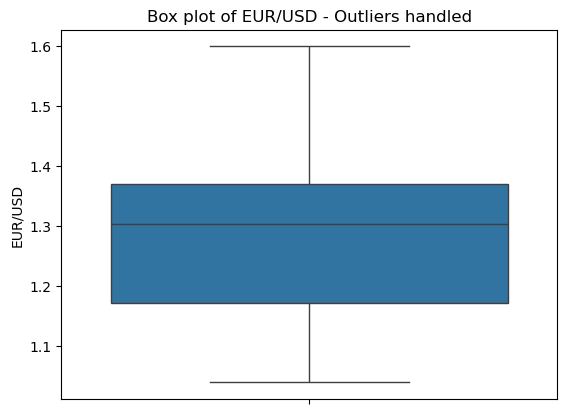

In [58]:
for col in X:
    q1=X[col].quantile(0.25)
    q3=X[col].quantile(0.75)
    iqr= q3-q1
    l_bw = q1-1.5*iqr
    u_bw = q3+1.5*iqr
    X[col].loc[X[col]>u_bw]=u_bw
    X[col].loc[X[col]<l_bw]=l_bw
    sns.boxplot(X[col])
    plt.title(f"Box plot of {col} - Outliers handled")
    plt.show()

# Again check Skewness

In [59]:
X.skew()

SPX        0.308083
USO        0.772517
SLV        0.924540
EUR/USD   -0.005292
dtype: float64

# Correlation of data

In [60]:
correlation = g_data.corr()

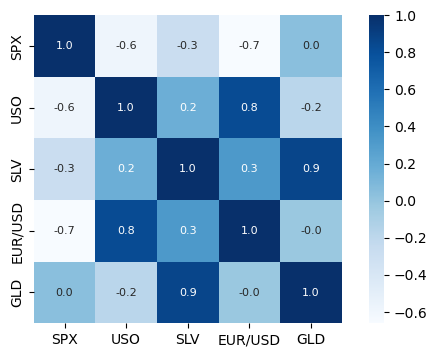

In [61]:
plt.figure(figsize=(7,4))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap="Blues")
plt.show()

In [62]:
print(correlation["GLD"])

SPX        0.044072
USO       -0.184249
SLV        0.866632
EUR/USD   -0.024375
GLD        1.000000
Name: GLD, dtype: float64


# train test split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Scaling

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # scaling is done on training data only
X_test  = scaler.transform(X_test)

In [65]:
len(X_train)

1832

In [66]:
len(X_test)

458

# 1st Model trained - Linear Regression

In [81]:
l_model=LinearRegression()
l_model.fit(X_train,y_train)  

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
y_train_pred = l_model.predict(X_train)    
y_test_pred = l_model.predict(X_test)

In [83]:
test_r2= r2_score(y_test,y_test_pred)
train_r2= r2_score(y_train,y_train_pred)

In [ ]:
print("Train R2 Score:", train_r2)   # it represents the percentage of variability in testing data
print("Test R2 Score :", test_r2)

Train R2 Score: 0.9090407838312969
Test R2 Score : 0.9279849610978299


# 2nd Model -  Random Forest Regressor Model

In [75]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)

In [76]:
rf_model.fit(X_train,y_train)    # fit the model on training data

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [78]:
test_r2=r2_score(y_test,y_test_pred)

In [79]:
train_r2=r2_score(y_train,y_train_pred)

In [80]:
print("Train R2 Score:", train_r2)
print("Test R2 Score :", test_r2)

Train R2 Score: 0.9983236857379457
Test R2 Score : 0.9901040569665351


# 3rd Model - GradientBoostingRegressor()

In [85]:
G_model=GradientBoostingRegressor()
G_model.fit(X_train,y_train) 

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [86]:
y_train_pred = G_model.predict(X_train)    
y_test_pred = G_model.predict(X_test)

In [88]:
test_r2= r2_score(y_test,y_test_pred)
train_r2= r2_score(y_train,y_train_pred)

In [89]:
print("Train R2 Score:", train_r2)   # it represents the percentage of variability in y v
print("Test R2 Score :", test_r2)

Train R2 Score: 0.9870936344083667
Test R2 Score : 0.9801495011431719


# ACTUAL VS PREDICTED GRAPH

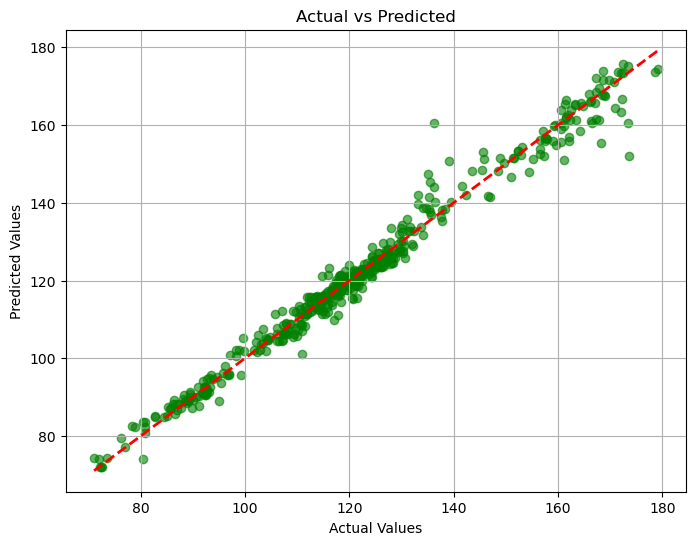

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [95]:
import streamlit as st
import pickle

In [96]:
pickle.dump(G_model,open("G_model.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))